> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [105]:
df_tmdb = pd.read_csv("tmdb-movies.csv")

In [106]:
df_tmdb.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4296,17809,tt0110200,0.310592,0,1907743,Jing wu ying xiong,Jet Li|Shinobu Nakayama|Chin Siu-Ho|Paul Chun ...,NaN,Gordon Chan,"To avenge his masters death, He'll fight like ...",...,"Chen Zhen, a Chinese engineering student in Ky...",103,Action,Eastern Productions,12/22/94,53,7.5,1994,0.000000e+00,2.806503e+06
1019,253849,tt1418754,0.304992,0,0,John Doe: Vigilante,Jamie Bamber|Lachy Hulme|Paul O'Brien|Sam Pars...,http://johndoevigilantefilm.com/,Kelly Dolen,Hero or Villain? Justice or Vengeance? You Dec...,...,Jamie Bamber portrays John Doe â€“ a man accus...,93,Thriller|Crime,Screen Corporation|Rapidfire Entertainment,3/21/14,32,6.2,2014,0.000000e+00,0.000000e+00
6078,376823,tt3231100,0.002647,0,0,Trophy Kids,NaN,NaN,Chris Bell,NaN,...,From the director of Bigger Stronger Faster co...,107,Documentary,NaN,12/4/13,10,7.8,2013,0.000000e+00,0.000000e+00
8995,944,tt0122151,1.206274,140000000,285444603,Lethal Weapon 4,Mel Gibson|Danny Glover|Joe Pesci|Rene Russo|J...,NaN,Richard Donner,The faces you love. The action you expect.,...,In the combustible action franchise's final in...,127,Action|Adventure|Comedy|Crime|Drama,Silver Pictures|Donner/Shuler-Donner Productio...,7/10/98,438,6.1,1998,1.872774e+08,3.818380e+08
1376,26517,tt0077914,0.113714,0,0,Martin,John Amplas|Lincoln Maazel|Christine Forrest|E...,NaN,George A. Romero,He could be the boy next door...,...,Martin (John Amplas) sedates women with a syri...,95,Horror,Laurel Entertainment Inc.,5/23/77,17,6.3,1977,0.000000e+00,0.000000e+00


In [107]:
df_tmdb.shape

(10866, 21)

In [108]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [109]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Missing Values

In [110]:
df_tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [111]:
df_tmdb.drop(labels=["id","imdb_id","homepage","tagline","keywords","overview"],axis=1,inplace=True)

In [112]:
df_tmdb.dropna( subset=['cast','director','genres',"production_companies"],axis=0 ,inplace=True)

#### Duplicated Values

In [113]:
df_tmdb.duplicated().sum()

1

In [114]:
df_tmdb.drop_duplicates(inplace=True)

In [115]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9772 non-null   float64
 1   budget                9772 non-null   int64  
 2   revenue               9772 non-null   int64  
 3   original_title        9772 non-null   object 
 4   cast                  9772 non-null   object 
 5   director              9772 non-null   object 
 6   runtime               9772 non-null   int64  
 7   genres                9772 non-null   object 
 8   production_companies  9772 non-null   object 
 9   release_date          9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
 13  budget_adj            9772 non-null   float64
 14  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64

### outliers
#### this data is not completed and accurated, So we are dealing with the zeros value like outlies

In [116]:
df_tmdb[df_tmdb.revenue == 0].shape 

(5022, 15)

In [117]:
new_df_tmdb = df_tmdb[(df_tmdb['revenue'] > 1000) & (df_tmdb['budget'] > 1000)]

In [118]:
new_df_tmdb.shape

(3772, 15)

### Spliting  genres columns and take the index 0 

In [ ]:
new_df_tmdb["zero_genres"] = new_df_tmdb.genres.str.split("|").str.get(0)

#### Null Values

In [120]:
new_df_tmdb.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
zero_genres             0
dtype: int64

### Functions used for ploting

In [121]:
def pie_plot(data, title):
    plt.figure(figsize = (18,15))
    plt.pie(data = data, x= data.zero_genres.value_counts(),labels=label,autopct='%1.1f%%');
    plt.legend(loc= "upper left");
    plt.title("percentage in a zero_genres column for 2011");
    plt.savefig(f"{title}.png",dpi=1000)
    
def bar_plot(t_xlablel,t_ylabel,title,c):
    """
    Parametar:
        t_xlabel: string >> title of x axis.
        y_ylabel: string >> title of y axis.
           title: string >> title of bar chart plot.
               c: string >> color of barchart.
    """
    plt.figure(figsize = (18,15))
    plt.bar(locations,  height,tick_label=label,color=c);
    plt.title(title);
    plt.xlabel(t_xlablel,fontdict={"fontsize":18})
    plt.ylabel(t_ylabel,fontdict={"fontsize":18})
    plt.savefig(f"{title}.png",dpi=1000)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.
 
 
 
> i wanna konw top 20 to help decision makers which movie spend your mony

###  What are the top 20 revenue movies?
<a id='q1'></a>

In [122]:
new_df_tmdb.groupby("original_title").max()["revenue"].nlargest(20)

original_title
Avatar                                           2781505847
Star Wars: The Force Awakens                     2068178225
Titanic                                          1845034188
The Avengers                                     1519557910
Jurassic World                                   1513528810
Furious 7                                        1506249360
Avengers: Age of Ultron                          1405035767
Harry Potter and the Deathly Hallows: Part 2     1327817822
Frozen                                           1274219009
Iron Man 3                                       1215439994
Minions                                          1156730962
Transformers: Dark of the Moon                   1123746996
The Lord of the Rings: The Return of the King    1118888979
Skyfall                                          1108561013
The Net                                          1106279658
The Dark Knight Rises                            1081041287
Pirates of the Caribbean:

>**Conclusion**: After the examination, I found that the films with the highest revenues are adventure and action films, such as (**Avatar,starwars...**)

> i wanna know Is there a relationship between low budget films and high revenues?

###    What are the top 20 budget movies?
<a id='q2'></a>

In [123]:
new_df_tmdb.groupby("original_title").max()["budget"].nlargest(20)

original_title
The Warrior's Way                               425000000
Pirates of the Caribbean: On Stranger Tides     380000000
Pirates of the Caribbean: At World's End        300000000
Avengers: Age of Ultron                         280000000
Superman Returns                                270000000
John Carter                                     260000000
Tangled                                         260000000
Spider-Man 3                                    258000000
The Lone Ranger                                 255000000
Harry Potter and the Deathly Hallows: Part 1    250000000
Harry Potter and the Half-Blood Prince          250000000
The Dark Knight Rises                           250000000
The Hobbit: An Unexpected Journey               250000000
The Hobbit: The Battle of the Five Armies       250000000
The Hobbit: The Desolation of Smaug             250000000
X-Men: Days of Future Past                      250000000
Spectre                                         245000000

>**Conclusion**:It was found that it is not a prerequisite for the budget to be low, and that the revenues from it are the highest among all films, and an example of this is Filak **“ِAvatar”** who has the highest revenues, but his budget is not low compared to the rest of the budgets of films

> The relationship between lack of popularity and genre of film

###  What are the lowest 10 popular movies?
<a id='q2'></a>

In [124]:
values = new_df_tmdb.groupby(["original_title","zero_genres"])["popularity"].min().reset_index()
values.sort_values("popularity").head(10)

,original_title,zero_genres,popularity
3749,Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´,War,0.010335
2496,Spacehunter: Adventures in the Forbidden Zone,Adventure,0.015727
3008,The In Crowd,Thriller,0.015997
2725,The Bad News Bears,Comedy,0.017498
3041,The Kid Stays in the Picture,Documentary,0.017708
957,Expelled: No Intelligence Allowed,Documentary,0.021371
135,Action Replayy,Drama,0.028227
1203,Hanging Up,Comedy,0.031018
3018,The Internship,Comedy,0.040858
2502,Special,Drama,0.040915


> **Conclusion**: It seems that films with less popularity are comedies, dramas and documentaries

> The relationship between the number of people's votes on films and the type of film

###  What are the top 10 most voted movies by audience?
<a id='q3'></a>

In [125]:
values = new_df_tmdb.groupby(["original_title","zero_genres"])["vote_count"].max().reset_index()
values.sort_values("vote_count",ascending=False).head(10)

,original_title,zero_genres,vote_count
1384,Inception,Action,9767
2717,The Avengers,Science Fiction,8903
282,Avatar,Action,8458
2831,The Dark Knight,Drama,8432
808,Django Unchained,Drama,7375
2994,The Hunger Games,Science Fiction,7080
1419,Iron Man 3,Action,6882
2832,The Dark Knight Rises,Action,6723
1407,Interstellar,Adventure,6498
2981,The Hobbit: An Unexpected Journey,Adventure,6417


> **Conclusion**: From the look, we conclude that the highest-rated films are action and adventure films

 > Genres VS vote_count

###  What are the lowest 5 voted movies by audience?
<a id='q4'></a>

In [126]:
values = new_df_tmdb.groupby(["original_title","zero_genres"])["vote_count"].min().reset_index()
values.sort_values("vote_count").head(5)

,original_title,zero_genres,vote_count
3041,The Kid Stays in the Picture,Documentary,10
1486,Julia,Drama,10
101,A Rage in Harlem,Crime,10
412,Black Nativity,Drama,10
556,Cats Don't Dance,Animation,10


>**Conclusion**: The lowest vote movies are darma, documentary .. 

> the relasionship between release year and popularity

###   What is the year for the top 10 most popular movies?

In [127]:
values = new_df_tmdb.groupby(["original_title","release_year"])["popularity"].max().reset_index()
values.sort_values("popularity",ascending=False).head(10)

,original_title,release_year,popularity
1508,Jurassic World,2015,32.985763
1696,Mad Max: Fury Road,2015,28.419936
1418,Interstellar,2014,24.949134
1190,Guardians of the Galaxy,2014,14.311205
1415,Insurgent,2015,13.112507
531,Captain America: The Winter Soldier,2014,12.971027
2552,Star Wars,1977,12.037933
1483,John Wick,2014,11.422751
2557,Star Wars: The Force Awakens,2015,11.173104
3014,The Hunger Games: Mockingjay - Part 1,2014,10.739009


>**Conclution**:The audience tends to watch the newly released 2014 and 2015 films

###  what is the smallest 10 movies in budget? 
<a id='q5'></a>

In [128]:
new_df_tmdb.groupby("original_title").min().nsmallest(10,["budget"])["budget"]

original_title
Primer                      7000
Weekend                     8000
Eraserhead                 10000
Pink Flamingos             12000
Paranormal Activity        15000
Bellflower                 17000
The Blair Witch Project    25000
Clerks                     27000
Catfish                    30000
Howl                       30000
Name: budget, dtype: int64

.**Conclusion**Looks like low-budget films are struggling in revenue

### what are the mean of the budget ?
<a id='q6'></a>

In [129]:
round(new_df_tmdb.budget.mean())

37853400

>**Conclusion**: The closer we get to the average, the higher the revenue

>I want to know whether the production rate of a particular category of films has an impact on another category

###  What is the percentage in a zero_genres column for 2011?
<a id='q7'></a>

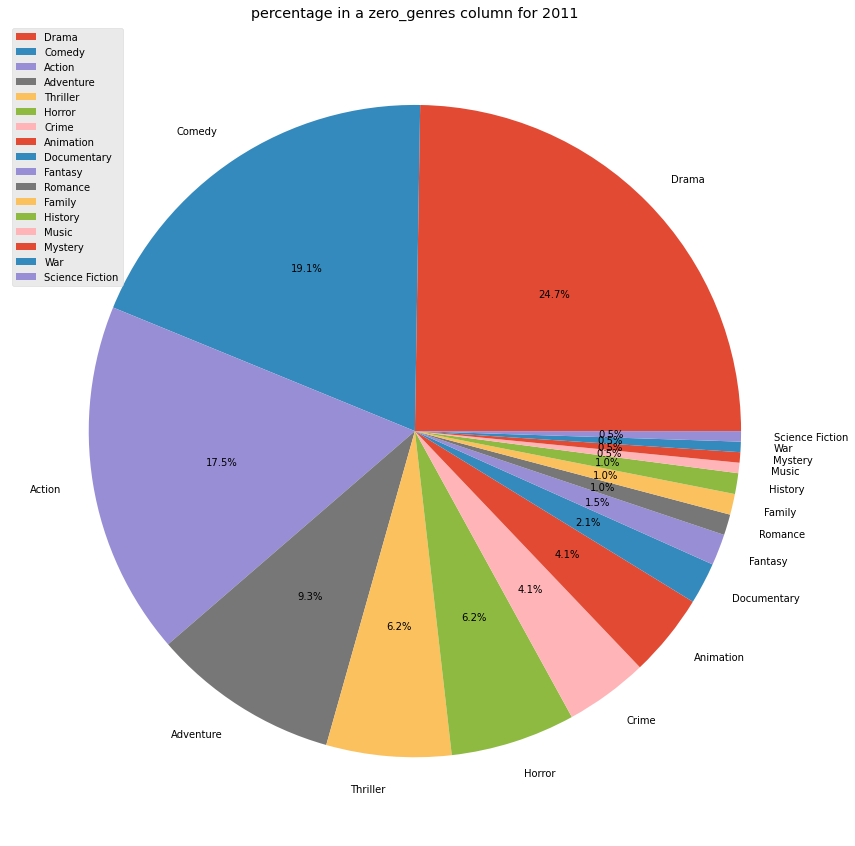

In [130]:

label = ["Drama" ,"Comedy","Action","Adventure","Thriller","Horror" , "Crime" ,"Animation","Documentary","Fantasy" ,"Romance",
          "Family","History","Music","Mystery","War","Science Fiction"]

year_2011 = new_df_tmdb[new_df_tmdb.release_year == 2011]
   
pie_plot(year_2011,"percentage in a zero_genres column for 2011")

###  What is the percentage in a zero_genres column for 2015?
<a id='q8'></a>

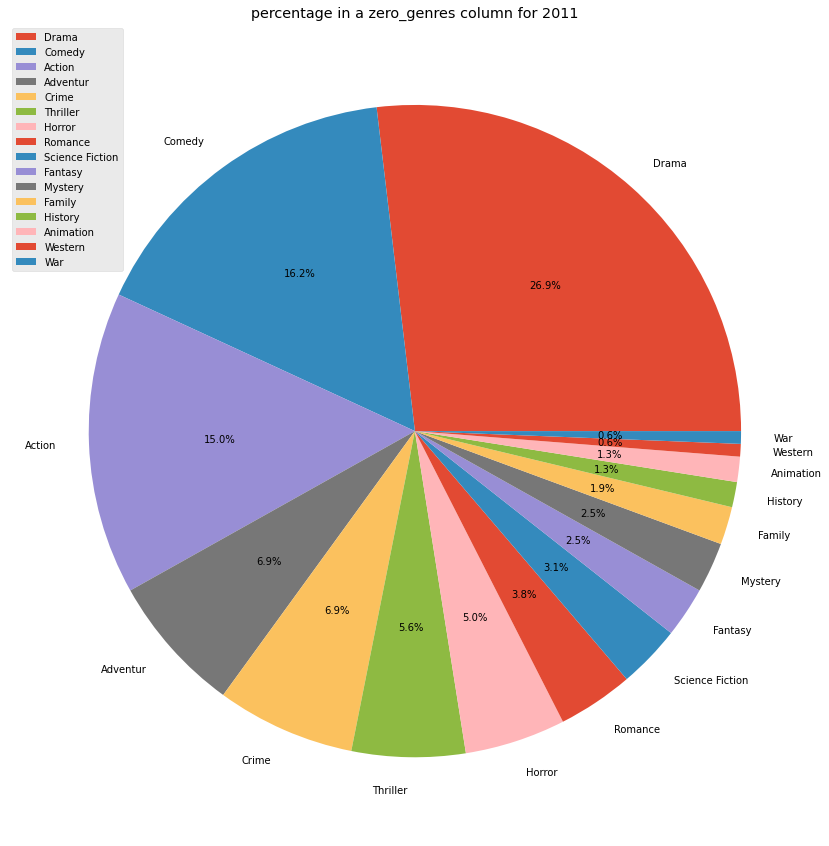

In [131]:
label = ["Drama","Comedy","Action","Adventur","Crime","Thriller","Horror","Romance","Science Fiction",
"Fantasy","Mystery","Family","History","Animation","Western","War"]

year_2015 = new_df_tmdb[new_df_tmdb.release_year == 2015]
pie_plot(year_2015,"percentage in a zero_genres column for 2015")


>**Conclusion**: Although comedies and dramas of 2011 and 2015 represent the majority of production, but their revenues are much less than action and adventure films.

> Mean of Revenue VS Genres

###  ًwhat is the revenue for each section in zero_genresb in 2011?
<a id='q9'></a>

In [132]:
height = year_2011.groupby("zero_genres").revenue.mean().nlargest(20)


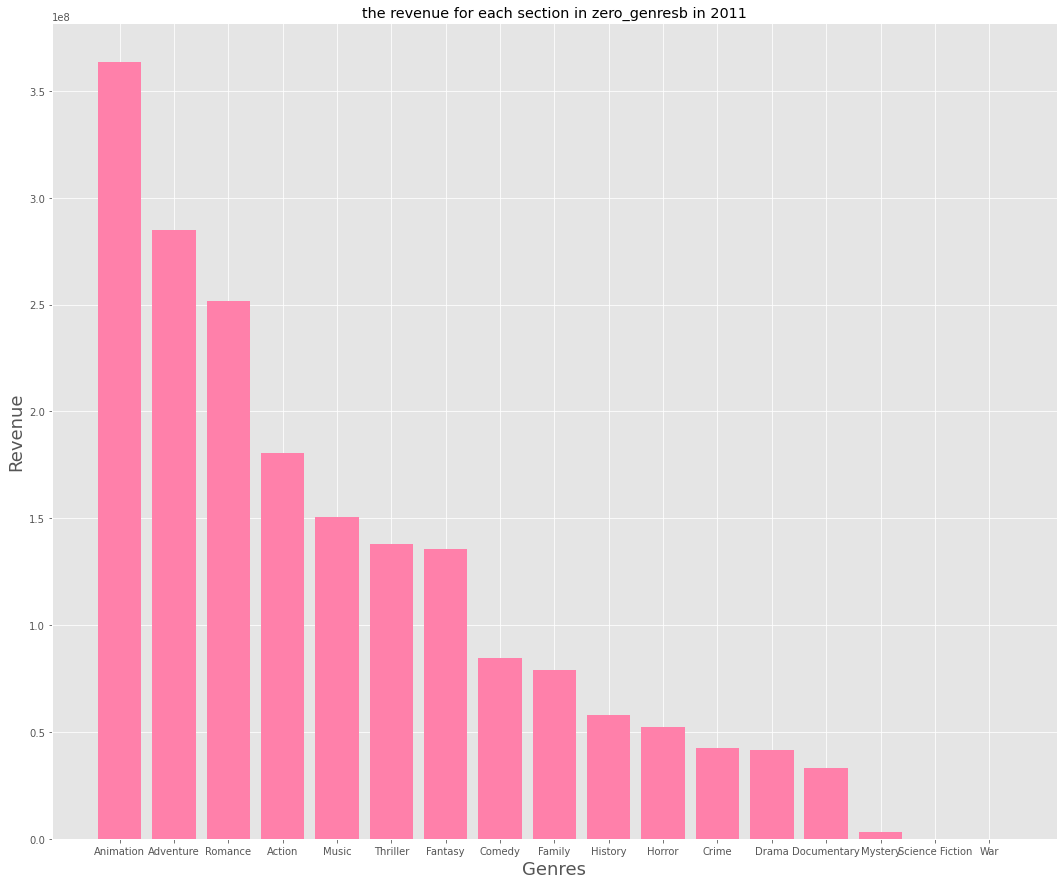

In [133]:
locations = np.arange(17)
label = ["Animation","Adventure","Romance","Action","Music" ,"Thriller" ,"Fantasy","Comedy","Family",
         "History","Horror","Crime","Drama" , "Documentary","Mystery","Science Fiction","War"]
    
bar_plot("Genres","Revenue","the revenue for each section in zero_genresb in 2011","#FF80AA")

>**Conclusion**:It is clear from the bar chart that the films in 2011 with the highest revenues are animation, adventure, and action, and they often represent the majority of revenues.

>Budget VS Genres

###  ًwhat is the budget for each section in zero_genresb in 2011?
<a id='q10'></a>

In [134]:
height = year_2011.groupby("zero_genres").budget.mean().nlargest(20)


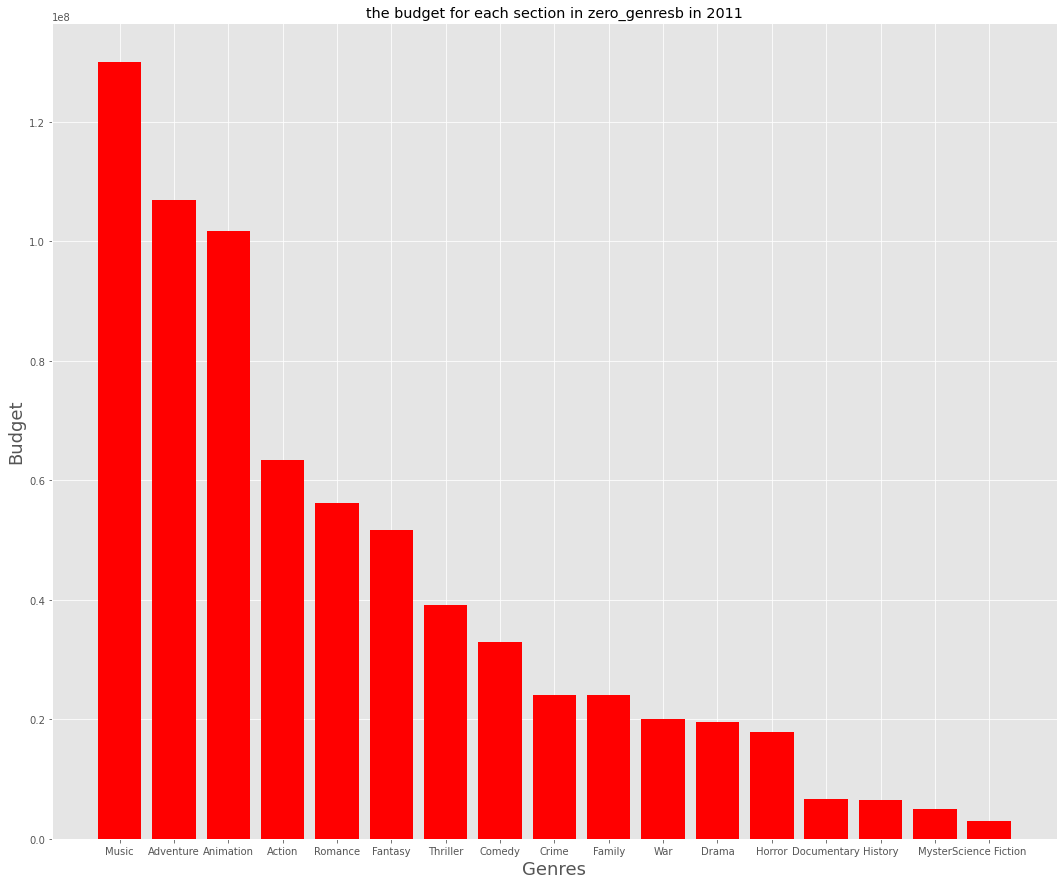

In [135]:
locations = np.arange(17)
label = ["Music","Adventure","Animation","Action","Romance","Fantasy","Thriller","Comedy","Crime","Family","War","Drama","Horror","Documentary","History","Myster","Science Fiction"]

bar_plot("Genres","Budget","the budget for each section in zero_genresb in 2011","red")

>**Conclusion**:The budget of the film is not supposed to be low and the revenues high. If we look at the fee, we will find that the films with the most budget are the films that earn higher revenues, and the lower films are those that earn less revenue, often according to **2011**

>This is just a confirmation question for the previous questions

###  The five most popular films and their genre.
<a id='q11'></a>

In [136]:
values = new_df_tmdb.groupby(["original_title","zero_genres"])["popularity"].max().reset_index()
height = values.sort_values("popularity",ascending=False).head(5)
height

,original_title,zero_genres,popularity
1497,Jurassic World,Action,32.985763
1685,Mad Max: Fury Road,Action,28.419936
1407,Interstellar,Adventure,24.949134
1181,Guardians of the Galaxy,Action,14.311205
1404,Insurgent,Adventure,13.112507


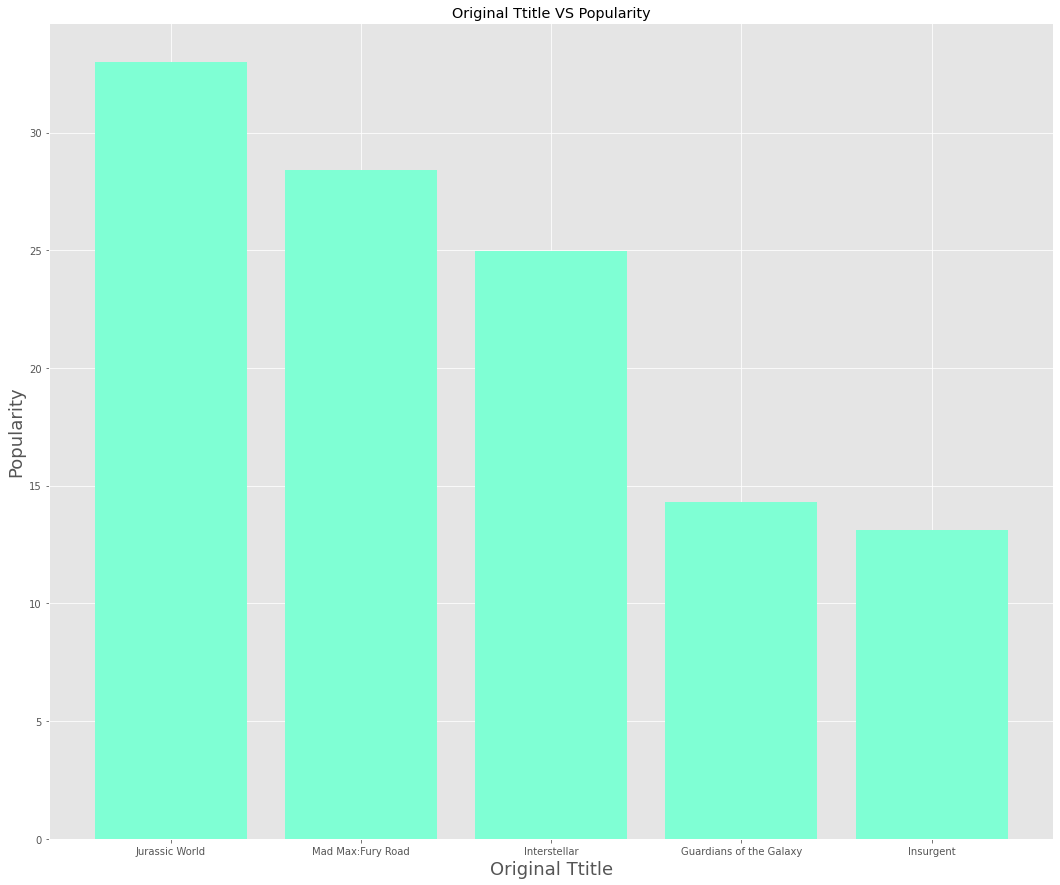

In [137]:
height = height["popularity"]
locations = np.arange(5)
label= ["Jurassic World","Mad Max:Fury Road","Interstellar","Guardians of the Galaxy","Insurgent"]

bar_plot("Original Ttitle","Popularity","Original Ttitle VS Popularity","#7FFFD4")

>**Conclusion**:You will find that, for example, the movie **“Interstellar”** is one of the most popular and of its kind **"Adventure"**

## STORYTELLING


>After examining the data related to IMDb, we will find that the main question is how to take advantage of spending money in order to get the highest revenue from the film and gain the largest audience base, and the film gets the highest popularity among the audience, and on this basis, some sub-question was raised in order to reach an answer this question

### Quesions
<ul>
<li><a href="#q1">What are the top 20 revenue movies?</a></li>
<li><a href="#q2">What are the top 20 budget movies?</a></li>
<li><a href="#q3">What are the top 10 most voted movies by audience?</a></li>
<li><a href="#q4">What are the lowest 5 voted movies by audience?</a></li>
<li><a href="#q5">what is the smallest 10 movies in budget?</a></li>
<li><a href="#q6">what are the mean of the budget ?</a></li>
<li><a href="#q7">What is the percentage in a zero_genres column for 2011?</a></li>
<li><a href="#q8">What is the percentage in a zero_genres column for 2015?</a></li>
<li><a href="#q9">what is the revenue for each section in zero_genresb in 2011?</a></li>
<li><a href="#q10">ًwhat is the budget for each section in zero_genresb in 2011?</a></li>
<li><a href="#q11">The five most popular films and their genre.</a></li>
</ul>

<a id='conclusions'></a>
## Conclusions
>After all, the solution is to increase spending on the category of animation, adventure and action films, and raise the annual production of them, and reduce spending on comedies and dramas.
### limitations
 >The only problem I faced was the huge **missing value** in the revenue and budget columns, which exceeded 50%, so I had to treat it as **outliers**,It is assumed that before starting the project, this data should be
 <ul>
    <li>ِِAccessable</li>
    <li>Accurate</li>
    <li>Complete</li>
    <li>Flexible</li>
    <li>Secure</li>
    <li>Timely</li>
</ul>



> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1